In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [6]:
df=pd.read_csv("../Dataset/spaceship_titanic_train.csv")
x_test=pd.read_csv("../Dataset/spaceship_titanic_test.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
df.shape

(8693, 14)

In [13]:
df.drop(columns=["PassengerId","Name"],inplace=True)

In [26]:
df.head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
5,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
6,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
7,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,True
8,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True
9,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True


In [25]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [44]:
x_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

<Axes: >

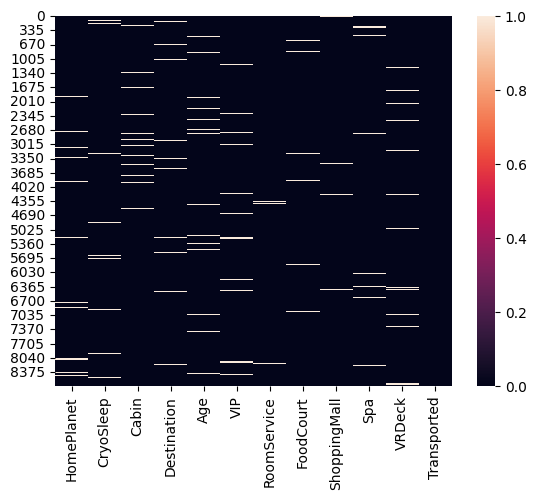

In [24]:
sns.heatmap(df.isnull())

In [39]:
def deck_split(x):
    if pd.isna(x):
        return None
    else:
        deck,_,_=x.split("/")
        return deck
    
def num_split(x):
    if pd.isna(x):
        return None
    else:
        _,num,_=x.split("/")
        return int(num)
def side_split(x):
    if pd.isna(x):
        return None
    else:
        _,_,side=x.split("/")
        return side

print((deck_split("w/233/p")))
print(num_split("w/233/p"))
print(side_split("w/233/p"))


w
233
p


In [ ]:
# def split_cabin(cabin):
#     if pd.isna(cabin):
#         return None, None, None
#     parts = str(cabin).split("/")
#     return (parts[0] if len(parts) > 0 else None,  
#             parts[1] if len(parts) > 1 else None,  
#             parts[2] if len(parts) > 2 else None)

In [ ]:
df[['Deck']]=df['Cabin'].apply(deck_split).apply(pd.Series)
df[['Num']]=df['Cabin'].apply(num_split).apply(pd.Series)
df[['Side']]=df['Cabin'].apply(side_split).apply(pd.Series)

X=df

In [42]:
df.head(3)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0.0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0.0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0.0,S


In [ ]:
test1=df.groupby(by="deck")

<Axes: xlabel='deck'>

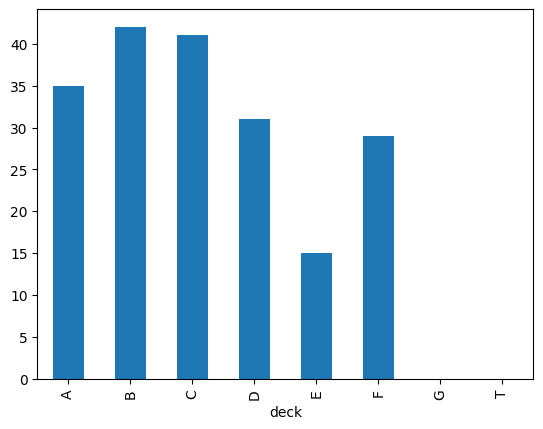

In [ ]:
test1.VIP.sum().plot(kind="bar")

#### This shows people who bought VIP purchase mostly stayed in A,B,C

<Axes: xlabel='CryoSleep'>

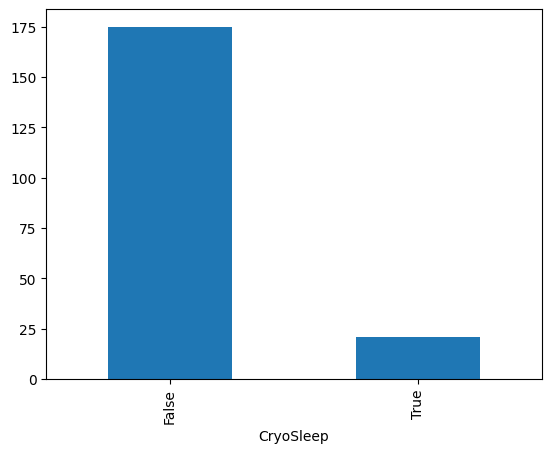

In [63]:
test2=df.groupby(by="CryoSleep")
test2.VIP.sum().plot(kind="bar")

#### This shows people who bought VIP purchase didnt use CryoSleep

<Axes: xlabel='Destination'>

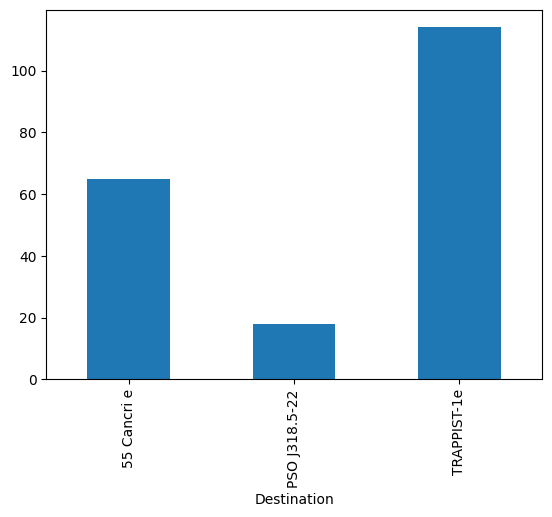

In [69]:
test3=df.groupby(by=["Destination"])
test3.VIP.sum().plot(kind="bar")

#### This shows people who bought VIP purchase mostly went to TRAPPIST-1e and then 55 Cancri e

<Axes: xlabel='side,VIP'>

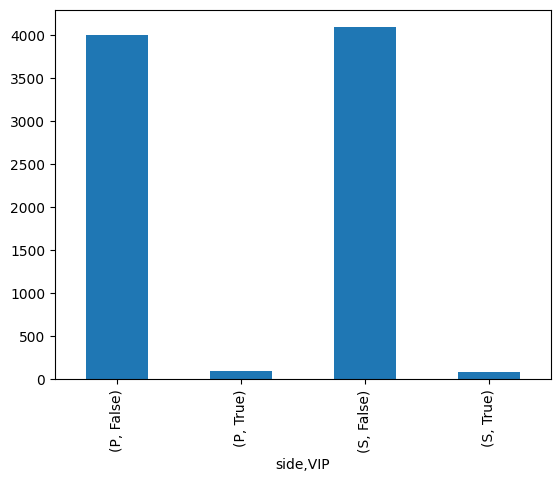

In [75]:
test3=df.groupby(by="side")
test3.VIP.value_counts().plot(kind="bar")

#### People who did not buy VIP used P side much